In [48]:
import pandas as pd

In [49]:
df = pd.read_excel('../data/result0409.xlsx')
df

,date,time,ID,impCnt,clkCnt,convAmt,cpc,salesAmt,ccnt,avgRnk
0,2021-04-02,7,cmp-a001-01-000000003987161,106,0,0.00,0,0,0,2.2
1,2021-04-02,8,cmp-a001-01-000000003987161,134,0,0.00,0,0,0,1.9
2,2021-04-02,9,cmp-a001-01-000000003987161,137,0,0.00,0,0,0,2.6
3,2021-04-02,10,cmp-a001-01-000000003987161,152,0,0.00,0,0,0,3.1
4,2021-04-02,11,cmp-a001-01-000000003987161,317,0,0.00,0,0,0,2.3
...,...,...,...,...,...,...,...,...,...,...
475,2021-04-08,19,cmp-a001-01-000000003987168,470,0,0.00,0,0,0,1.6
476,2021-04-08,20,cmp-a001-01-000000003987168,656,0,0.00,0,0,0,1.6
477,2021-04-08,21,cmp-a001-01-000000003987168,567,1,0.18,99,99,0,1.5
478,2021-04-08,22,cmp-a001-01-000000003987168,586,0,0.00,0,0,0,1.6


In [50]:
df['ID'] = 'cmp-a001-01-000000003987186'
df

,date,time,ID,impCnt,clkCnt,convAmt,cpc,salesAmt,ccnt,avgRnk
0,2021-04-02,7,cmp-a001-01-000000003987186,106,0,0.00,0,0,0,2.2
1,2021-04-02,8,cmp-a001-01-000000003987186,134,0,0.00,0,0,0,1.9
2,2021-04-02,9,cmp-a001-01-000000003987186,137,0,0.00,0,0,0,2.6
3,2021-04-02,10,cmp-a001-01-000000003987186,152,0,0.00,0,0,0,3.1
4,2021-04-02,11,cmp-a001-01-000000003987186,317,0,0.00,0,0,0,2.3
...,...,...,...,...,...,...,...,...,...,...
475,2021-04-08,19,cmp-a001-01-000000003987186,470,0,0.00,0,0,0,1.6
476,2021-04-08,20,cmp-a001-01-000000003987186,656,0,0.00,0,0,0,1.6
477,2021-04-08,21,cmp-a001-01-000000003987186,567,1,0.18,99,99,0,1.5
478,2021-04-08,22,cmp-a001-01-000000003987186,586,0,0.00,0,0,0,1.6


In [51]:
#df.rename({'ctr':'클릭률','convAmt':'전환매출액','clkCnt':'클릭수','cpc':'평균클릭비용','ccnt':'전환수','avgRnk':'평균노출순위','impCnt':'노출수','salesAmt':'총비용'},axis=1,inplace=True)

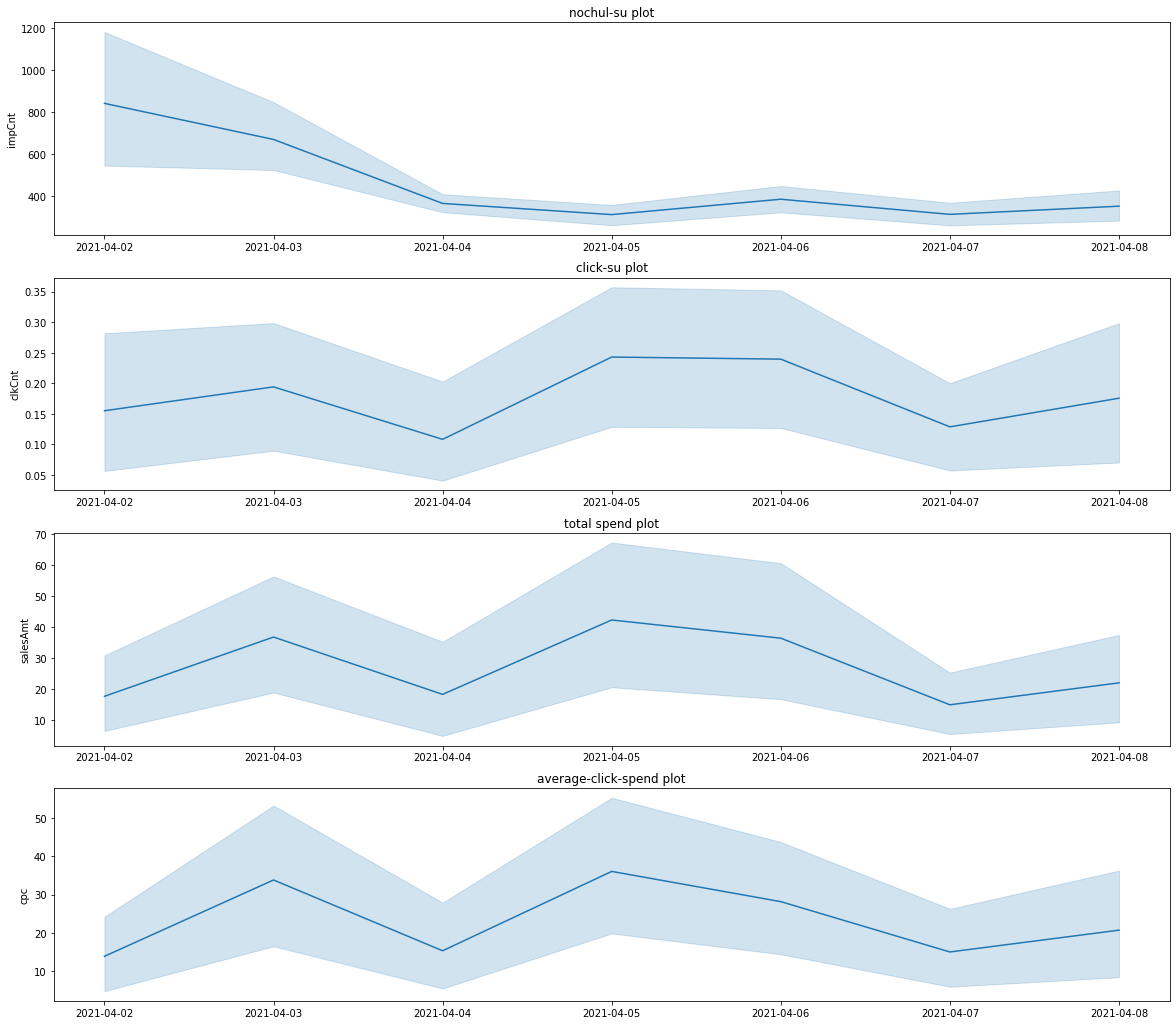

In [52]:
from matplotlib import pyplot as plt
import seaborn as sns 
figure, axes = plt.subplots( 4, 1, figsize=(20,18))

sns.lineplot( x='date', y='impCnt', data= df, ax= axes[0])
sns.lineplot( x='date', y='clkCnt', data= df, ax= axes[1])
sns.lineplot( x='date', y='salesAmt', data= df, ax= axes[2])
sns.lineplot( x='date', y='cpc', data= df, ax= axes[3])

axes[0].set_title('nochul-su plot')
axes[1].set_title('click-su plot')
axes[2].set_title('total spend plot')
axes[3].set_title('average-click-spend plot')
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')

plt.show()


## ARIMA(Autoregressvie integrated MovingAverage)
### AR(자기상관) : 이전의 값이 이후의 값에 영향을 미치고 있는 상황
### MA(이동평균) : 랜덤 변수의 평균값이 지속적으로 증가하거나 감소하는 추세

In [56]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(df.impCnt.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

/anaconda/envs/py37_default/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  479
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3654.240
Method:                       css-mle   S.D. of innovations            497.130
Date:                Mon, 12 Apr 2021   AIC                           7320.480
Time:                        06:36:22   BIC                           7345.510
Sample:                             1   HQIC                          7330.320
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6582      7.704      0.085      0.932     -14.442      15.759
ar.L1.D.y     -0.3597      0.125     -2.880      0.004      -0.605      -0.115
ar.L2.D.y      0.2030      0.126      1.617      0.1

/anaconda/envs/py37_default/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [65]:
nochulsu_test_df['date'] = pd.to_datetime(nochulsu_test_df['date'])
nochulsu_test_df


,date,impCnt
0,2021-04-02,106
1,2021-04-02,134
2,2021-04-02,137
3,2021-04-02,152
4,2021-04-02,317
...,...,...
475,2021-04-08,470
476,2021-04-08,656
477,2021-04-08,567
478,2021-04-08,586


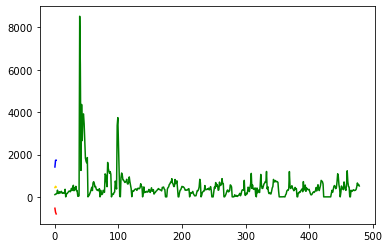

In [74]:
forecast_data = model_fit.forecast(steps=3) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.
test_file_path = '../data/result_test.xlsx'
nochulsu_test_df = pd.read_excel(test_file_path, names=['ds', 'y'])

pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = nochulsu_test_df.y.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

## Prophet 시계열 예측 라이브러리

In [72]:
from fbprophet import Prophet

# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'
nochulsu_df = pd.read_excel(test_file_path, names=['ds', 'y'])
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(nochulsu_df)

/anaconda/envs/py37_default/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


In [75]:
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

/anaconda/envs/py37_default/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/anaconda/envs/py37_default/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


,ds,yhat,yhat_lower,yhat_upper
480,2021-04-09,352.612446,-517.202213,1193.318904
481,2021-04-10,361.354541,-555.828937,1244.364869
482,2021-04-11,271.838790,-556.962046,1138.459068
483,2021-04-12,279.074663,-624.256260,1095.062365
484,2021-04-13,353.433821,-479.013925,1207.950845


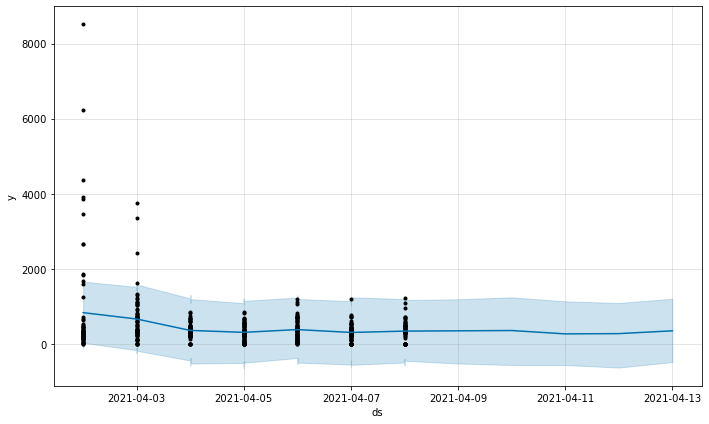

In [76]:
fig1 = prophet.plot(forecast_data)